# Autoencoders

En los últimos tiempos ha ganado especial relevancia una aproximación que ha venido en llamarse o denominarse como aprendizaje profundo o *Dep Learning*. Las aproximaciones de *Deep Learning* tienen por objeto acometer uno de los grandes problemas de cualquiera de las aproximaciones de *machine learning* clásicas que es la ingeniería de las características y determinar que medidas son las más significativas.

Una de las posibles alternativas para esa ingeniería de características automáticas es lo que se conoce como ***Staked Autoencoders (SAE)***. Está técnica tiene como base el uso de una técnica de reducción de la dimensionalidad que se conoce como ***Autoencoders***. Sin entrar en demasiados detalles formales, la técnica se basa en una  redes de neuronas artificiales que  trata de recrear la entrada en la salida Esto se consigo con una capa oculta la cual se corresponde con una transposición en del espacio de entrada en otro que se conoce como espacio oculto o latente $h$ en la imagen que sigue a estas líneas. Lo que se busca es que la red aprenda ya sea a comprimir la información, si la dimensión de $h$ es menor que la de $X$, o bien a expandir dicha información en caso de que la mencionada dimensión de $h$ sea mayor que la de $X$.
![Autoencoder](https://upload.wikimedia.org/wikipedia/commons/3/37/Autoencoder_schema.png)
Así, a la red se le presentarían un conjunto de patrones $X$ que se espera que está codifique en un conjunto de características representadas en la capa $h$ recibiendo este par de capas el nombre de codificador. Sin embargo para entrenar necesitamos el segundo par de capas como es $h$ y $X´$, que recibe el nombre de decodificador. Este decodificador lo que se busca es que sea capaz de reconstruir la entrada desde el conjunto de características $h$. Para hacer este proceso se colocan las capas como en la figura y una vez puesta una entrada se comrpueba la salida completa de la red, esta salida lo que tiene como salida deseada la propia entrada de la misma. Calculando el error en la salida, se puede aplicar la regla de retropropagaciónd el error a la conjunto de la red, con lo que las carácterísticas codificas en $h$ se ajustaran se modificarán para ajustar la salida y por lo tanto capturando aquellas que le permitan reconstruir la entrada obviando las generalidades. 

Una vez que la red está entrenada podemos descartar la última capa y quedarnos con la codificación obtenida en $h$ como salida que desde ese momento tendrá un coste muy bajo de ejecución a tiempo y recursos constantes. De esta forma se puede comprimir la información de casi cualquier tipo de fuente de información desde una señal temporal, una imagen, un sonido, una codificaciónd e texto.

Para está unidad al igual que en la anterior vamos a hacer uso de ***Tensorflow*** y ***keras*** para simplificar la implementación de un autoencoder. 


In [1]:
#Importar algunas librerías que nos harán falta más adelante
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

El problema que se va a utilizar un problema de imagenes que tiene por objeto el codificas identificar imagenes de  distintos tipos de ropa. El motivo es que es más sencillo de visualizar los resultados.

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
print(x_train.shape)
print(x_test.shape)

4423680/4422102 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


A continuación, vamos a definir el *encoder* y el *decoder* mencionados al comienzo de está unidad. En esta ocasión y por motivos de simplificación del cófigo, vamos a crear una clase que es una estructura de programación que nos permitirái definir modelos compuestos par partes como este de manera simple y rápida. Así en una clase, se definen un par de funciones una *init* que nos permite definir el modelo y una segunda call que es llamada por *Tensorflow* cuando le hace falta dentro del entrenamiento. 

In [3]:
class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = tf.keras.Sequential([
            # Se aplana la imagen para que entre
            layers.Flatten(),
            #Se conectan dos entradas Densas para construir la primera parte X -> h
            layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
            #Se conectan dos entradas Densas para construir la primera parte h -> X'
            layers.Dense(784, activation='sigmoid'),
            #Reconstruir la imagen 28 x28 de la salida
            layers.Reshape((28, 28))
        ])
        
    def call(self, x):
        """Función llamada tanto dentro de fit para calcular la salida del Modelo"""
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
#Creación del modelo    
autoencoder = Autoencoder(64)

Por último, bastará con compilar y entrenar el modelo, tengan en cuenta que esto puede tardar bastante dependiendo del tamaño de la base de datos utilizada para entrenar. En este caso lo limitaremos a sólo 10 iteraciones para reducir ese tiempo ya que el problema a tratar es bastante grande.

In [4]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0391 - val_loss: 0.0128
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0119 - val_loss: 0.0104
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0101 - val_loss: 0.0096
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0091 - val_loss: 0.0092
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0089 - val_loss: 0.0091
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0088 - val_loss: 0.0090
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0088 - val_loss: 0.0088
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.008

Comprobemos ahora la salida tando del *encoder* como del *decoder* con unas cuantas imágenes del conjunto de test.

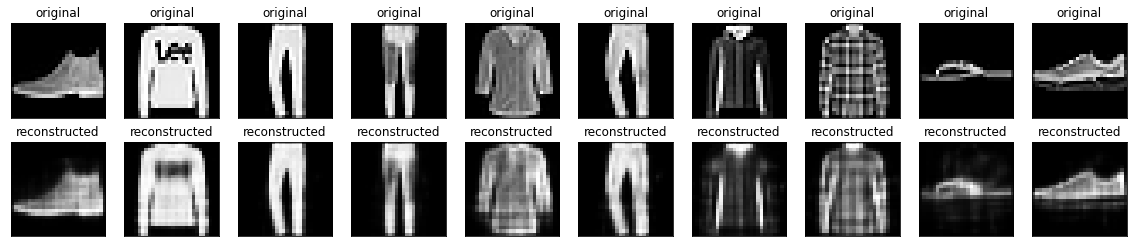

In [5]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
# display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

Tambien podemos ver la codificación reacilizada por el encoder si bien este no nos aportará demasiada información de primeras.

In [6]:
for i in range(n):
    print(f'Codificación de la imagen {i}: {encoded_imgs[i]}')

Codificación de la imagen 0: [1.695061   1.8479075  1.5127122  5.082312   2.8965173  1.9261005
 1.900814   1.1458843  3.5737348  0.7456745  1.5456582  1.0412942
 3.277858   1.7157044  1.6875861  2.190462   1.6820954  1.5443034
 3.370356   4.024044   0.34282154 2.7001054  0.8742959  2.6736045
 0.         3.3593063  3.7466054  1.6675767  1.4026334  3.0072951
 4.892288   2.7747936  1.2060362  2.720502   5.982143   2.23511
 0.96123207 2.0601256  0.7578739  2.9108367  4.907216   5.1190615
 1.4317958  4.3214784  2.1825855  1.0982268  2.7346663  2.1901045
 1.9636621  2.2568226  1.7895975  2.0782924  0.89352536 2.7234635
 4.804452   1.1934166  1.662682   0.80558074 1.260127   4.860684
 1.3781681  3.5428076  1.6845771  1.5844544 ]
Codificación de la imagen 1: [2.7878683  6.0749497  1.6586156  4.6612144  3.6106477  1.6497269
 1.2767572  3.3459492  2.794146   9.326046   2.2999706  5.072232
 5.000166   0.5855569  3.9756227  1.5601776  4.7062864  1.2364753
 3.6002316  0.6143255  4.4592113  0.218595

Con está base se puede construir un SAE ya que lo que habría que hacer es entrenar un AE y una vez minimizado el error se bloquean los pesos de la primera capa, se retira la se última y se añade otra capa oculta con una nueva capa de salida y se repite el entrenamiento con la entrada como salida. En este caso estaremos entrenado una segunda etapa de codificación que se basará en la primera. Este proceso se podría repetir multiplés veces para dar a luz a las que fueron las primeras redes neuronales conocidas como *Deep Learning*. 

### Ejercicio Propuesto
Ahora ha llegado el momento de jugar de que prueben a modificar este sistema, ahora que conocemos el problema comprube que pasa si se aumenta la dimensión de la capa oculta o se disminuye drasticamente. ¿Cómo queda nuestra representación? ¿Es igual de eficaz? En cuanto al error de entrenamiento, ¿Sube o baja con esas variaciones en las dimensiones? 